In [246]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [248]:
la_crime_df=pd.read_csv("./Data/LA_Crime_Data.csv")
la_crime_df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [249]:
any(la_crime_df.isna())

True

In [250]:
duplicates = la_crime_df.duplicated(subset=['DR_NO'])

# Check if there are any duplicates
has_duplicates = duplicates.any()

print(f"Are there duplicates in 'my_column'? {has_duplicates}")

Are there duplicates in 'my_column'? False


In [251]:
print("Number of rows: ", la_crime_df.shape[0])

Number of rows:  925720


In [252]:
print("Number of columns: ", la_crime_df.shape[1])

Number of columns:  28


In [253]:
la_crime_df.isnull().sum() # checkin for the number of null values across the dataframe

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           129462
Vict Age               0
Vict Sex          123158
Vict Descent      123168
Premis Cd             11
Premis Desc          559
Weapon Used Cd    606019
Weapon Desc       606019
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          858483
Crm Cd 3          923460
Crm Cd 4          925656
LOCATION               0
Cross Street      780494
LAT                    0
LON                    0
dtype: int64

In [254]:
la_crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [255]:
la_crime_df = la_crime_df[["DATE OCC","TIME OCC","AREA NAME","Rpt Dist No","Part 1-2","Crm Cd Desc","Vict Age","Vict Sex","Vict Descent",
                           "Status Desc","Crm Cd 1","LAT","LON"]]
la_crime_df.head(1)

,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,Crm Cd 1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [256]:
la_crime_df.shape

(925720, 13)

In [257]:
la_crime_df.isnull().sum(axis = 0)

DATE OCC             0
TIME OCC             0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd Desc          0
Vict Age             0
Vict Sex        123158
Vict Descent    123168
Status Desc          0
Crm Cd 1            11
LAT                  0
LON                  0
dtype: int64

In [258]:
la_crime_df=la_crime_df.dropna()
la_crime_df.shape

(802537, 13)

In [259]:
la_crime_df.head(2)

,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,Crm Cd 1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506
1,2/8/2020 0:00,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,Invest Cont,330.0,34.0444,-118.2628


In [260]:
#to remove the "-" in the column Vict Descent
filtered_df = la_crime_df[la_crime_df["Vict Descent"]!="-"]
la_crime_df = filtered_df
la_crime_df["Vict Descent"].value_counts()

Vict Descent
H    281378
W    187079
B    129709
X     93922
O     73010
A     20311
K      5085
F      4002
C      3712
J      1305
V       987
I       882
Z       458
P       250
U       190
D        75
G        67
L        63
S        50
Name: count, dtype: int64

In [261]:
la_crime_df.isnull().sum()

DATE OCC        0
TIME OCC        0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Status Desc     0
Crm Cd 1        0
LAT             0
LON             0
dtype: int64

In [262]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802535 entries, 0 to 925719
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE OCC      802535 non-null  object 
 1   TIME OCC      802535 non-null  int64  
 2   AREA NAME     802535 non-null  object 
 3   Rpt Dist No   802535 non-null  int64  
 4   Part 1-2      802535 non-null  int64  
 5   Crm Cd Desc   802535 non-null  object 
 6   Vict Age      802535 non-null  int64  
 7   Vict Sex      802535 non-null  object 
 8   Vict Descent  802535 non-null  object 
 9   Status Desc   802535 non-null  object 
 10  Crm Cd 1      802535 non-null  float64
 11  LAT           802535 non-null  float64
 12  LON           802535 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 85.7+ MB


In [263]:
# renaming for better readability
la_crime_df.rename(columns={"DATE OCC":"Date_Occ","TIME OCC":"Time_Occ","AREA NAME":"Area_Name","Rpt Dist No":"Rpt_Dist_No",
                            "Part 1-2":"Part_1-2","Crm Cd Desc":"Crm_Cd_Desc","Vict Age":"Vict_Age","Vict Sex":"Vict_Sex",
                           "Vict Descent":"Vict_Descent","Status Desc":"Status_Desc","Crm Cd 1":"Crm_Cd_1",
                            "LAT":"Lat","LON":"Lon"}, inplace = True)

In [264]:
la_crime_df.head(1)

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
0,3/1/2020 0:00,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [265]:


# Convert the 'DateTime' column to datetime type if not alread


la_crime_df['Date_Occ'] = pd.to_datetime(la_crime_df['Date_Occ'])



In [266]:
la_crime_df.head(1)

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
0,2020-03-01,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [267]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802535 entries, 0 to 925719
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      802535 non-null  datetime64[ns]
 1   Time_Occ      802535 non-null  int64         
 2   Area_Name     802535 non-null  object        
 3   Rpt_Dist_No   802535 non-null  int64         
 4   Part_1-2      802535 non-null  int64         
 5   Crm_Cd_Desc   802535 non-null  object        
 6   Vict_Age      802535 non-null  int64         
 7   Vict_Sex      802535 non-null  object        
 8   Vict_Descent  802535 non-null  object        
 9   Status_Desc   802535 non-null  object        
 10  Crm_Cd_1      802535 non-null  float64       
 11  Lat           802535 non-null  float64       
 12  Lon           802535 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 85.7+ MB


In [268]:
# To remove the value H value of Vict_Sex
la_crime_df=la_crime_df[la_crime_df["Vict_Sex"]!="H"]
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    379020
F    337975
X     85434
Name: count, dtype: int64

In [269]:
la_crime_df.nunique()

Date_Occ        1553
Time_Occ        1439
Area_Name         21
Rpt_Dist_No     1199
Part_1-2           2
Crm_Cd_Desc      138
Vict_Age         103
Vict_Sex           3
Vict_Descent      19
Status_Desc        6
Crm_Cd_1         139
Lat             5376
Lon             4968
dtype: int64

In [270]:
la_crime_df["Area_Name"].nunique()

21

In [271]:
# Top 10 crime location
la_crime_df["Area_Name"].value_counts().head(10)

Area_Name
Central        57981
77th Street    49198
Pacific        46137
Southwest      44808
Hollywood      44421
N Hollywood    40753
Olympic        40669
Wilshire       39826
Southeast      39272
West LA        38613
Name: count, dtype: int64

In [272]:
la_crime_df["Area_Name"].value_counts()

Area_Name
Central        57981
77th Street    49198
Pacific        46137
Southwest      44808
Hollywood      44421
N Hollywood    40753
Olympic        40669
Wilshire       39826
Southeast      39272
West LA        38613
Newton         37579
Rampart        37467
West Valley    34220
Topanga        34061
Van Nuys       34050
Northeast      33924
Devonshire     33273
Harbor         31917
Mission        30519
Hollenbeck     28033
Foothill       25708
Name: count, dtype: int64

In [273]:
la_crime_df["Area_Name"].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Topanga', 'Northeast', '77th Street',
       'N Hollywood', 'Hollenbeck', 'Harbor', 'Foothill', 'Devonshire',
       'Pacific'], dtype=object)

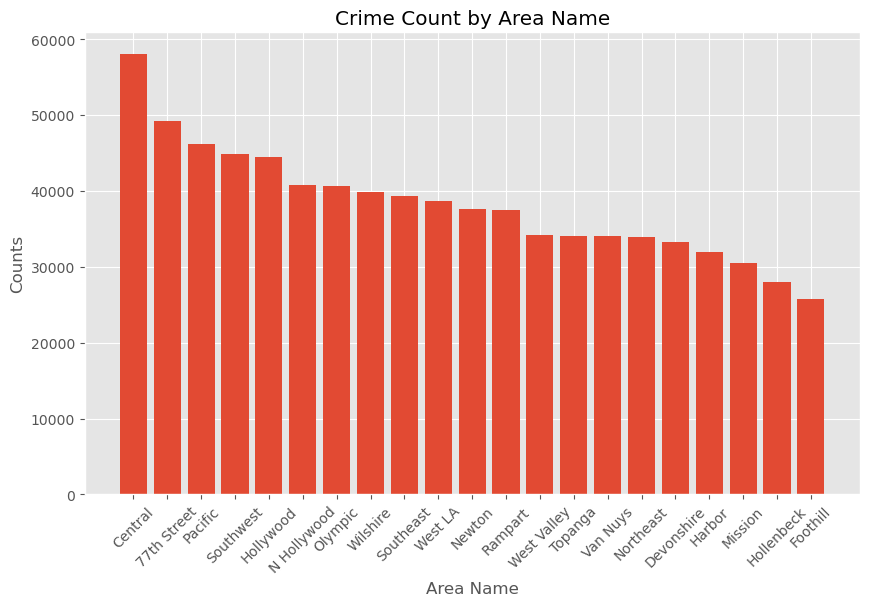

In [274]:

# Calculate value counts
area_counts = la_crime_df["Area_Name"].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(area_counts.index, area_counts.values)  # Use index and values to align data correctly
plt.xlabel("Area Name")
plt.ylabel("Counts")
plt.title("Crime Count by Area Name")
plt.xticks(rotation=45)  # Optional: Rotate the area names for better readability
plt.show()


In [275]:
la_crime_df["Crm_Cd_Desc"].nunique() # numbe of crime descriptions

138

In [276]:
# the top 10 crime types
la_crime_df["Crm_Cd_Desc"].value_counts().head(10)

Crm_Cd_Desc
BATTERY - SIMPLE ASSAULT                                   73348
BURGLARY FROM VEHICLE                                      57042
THEFT OF IDENTITY                                          57031
BURGLARY                                                   56669
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    56107
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             52462
THEFT PLAIN - PETTY ($950 & UNDER)                         47108
INTIMATE PARTNER - SIMPLE ASSAULT                          45882
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        33048
ROBBERY                                                    31491
Name: count, dtype: int64

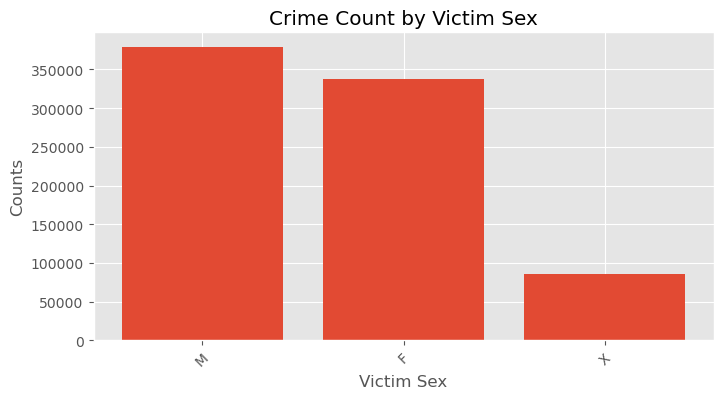

In [277]:


# Calculate value counts for the 'Vict_Sex' column
sex_counts = la_crime_df['Vict_Sex'].value_counts()

# Plotting
plt.figure(figsize=(8, 4))  # Set the figure size as needed
plt.bar(sex_counts.index, sex_counts.values)  # You can choose any color
plt.xlabel('Victim Sex')
plt.ylabel('Counts')
plt.title('Crime Count by Victim Sex')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


In [278]:
#Filtering out Vict_Age to greater than zero
la_crime_df = la_crime_df[la_crime_df["Vict_Age"]> 0]

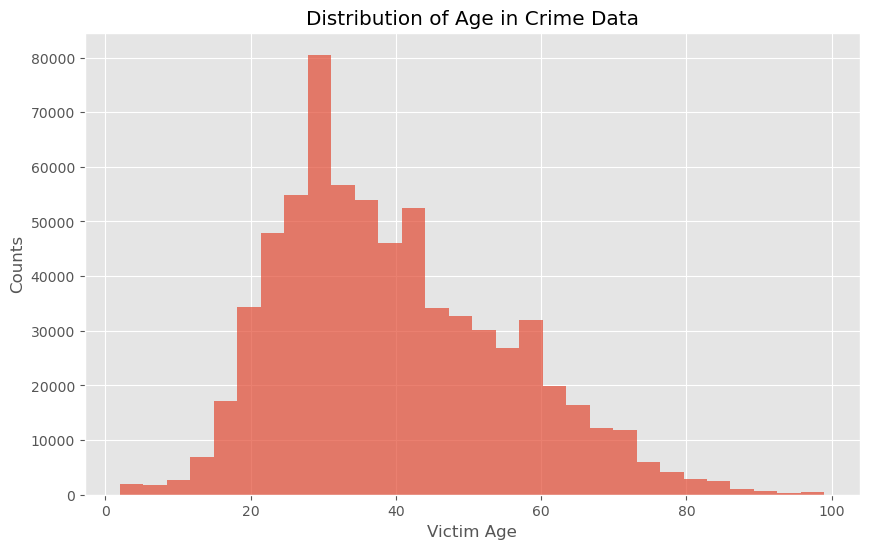

In [279]:
# Age of Victims Distribution


la_crime_df['Vict_Age'] = pd.to_numeric(la_crime_df['Vict_Age'], errors='coerce')

# Drop any NaN values that may have resulted from conversion errors or existing in data
la_crime_df = la_crime_df.dropna(subset=['Vict_Age'])

# Plotting a histogram of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(la_crime_df['Vict_Age'], bins=30, alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Victim Age')
plt.ylabel('Counts')
plt.title('Distribution of Age in Crime Data')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()


In [280]:
la_crime_df["Vict_Age"].max(), la_crime_df["Vict_Age"].min()

(99, 2)

In [281]:
# Top 5 Vict Descents
top5 =la_crime_df.groupby(["Vict_Descent"])["Vict_Age"].count()
top5

Vict_Descent
A     19980
B    128204
C      3706
D        75
F      3938
G        67
H    276655
I       881
J      1304
K      5059
L        62
O     60991
P       249
S        45
U       156
V       981
W    173400
X     15065
Z       458
Name: Vict_Age, dtype: int64

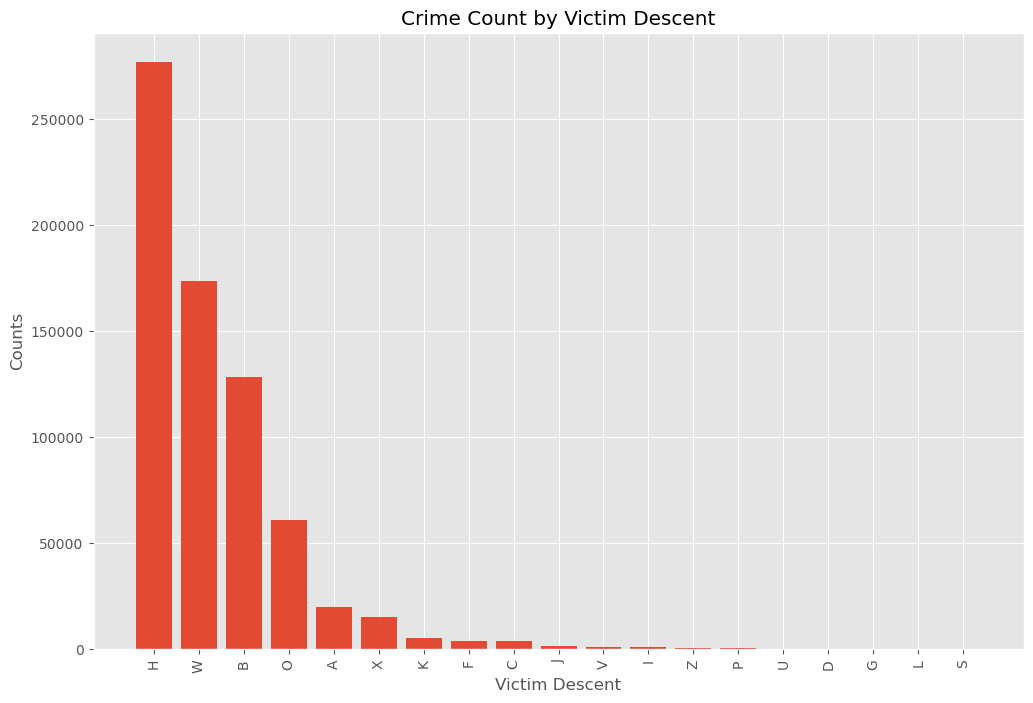

In [282]:

# Calculate the value counts for the 'Vict_Descent' column
descent_counts = la_crime_df['Vict_Descent'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(descent_counts.index, descent_counts.values)
plt.xlabel('Victim Descent')
plt.ylabel('Counts')
plt.title('Crime Count by Victim Descent')
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many categories
plt.show()


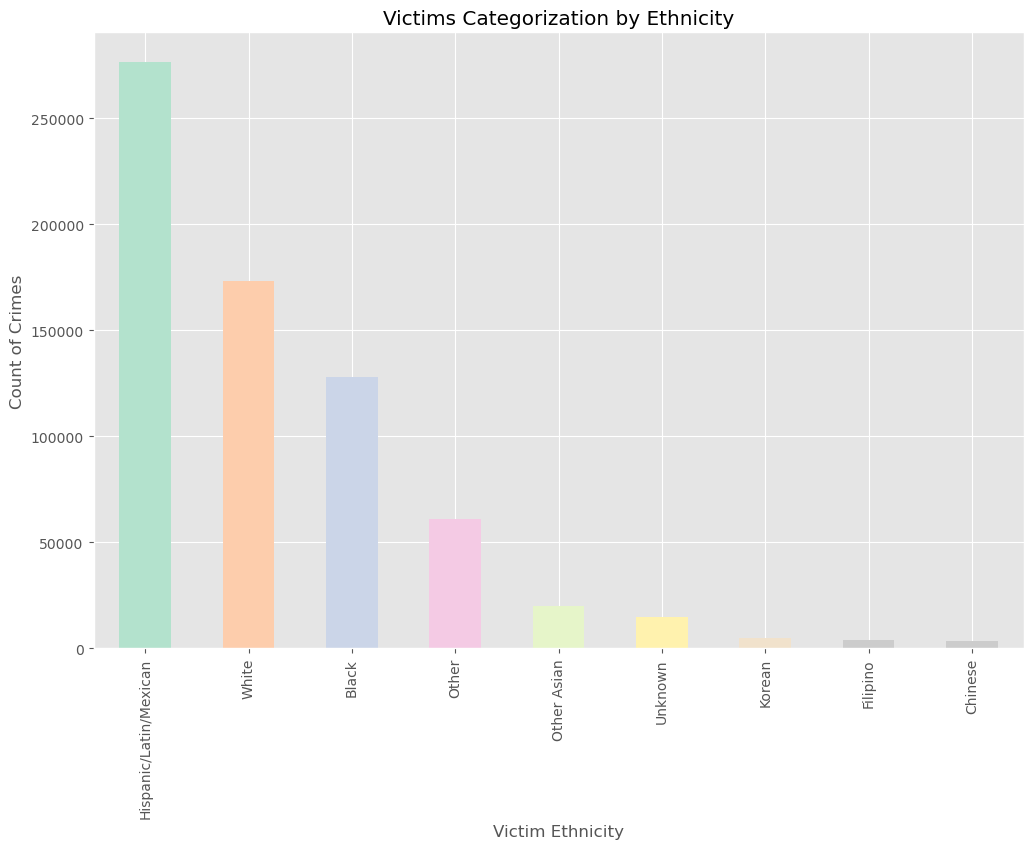

In [283]:


# Renaming values in the 'Vict_Descent' column
rename_dict = {
    'H': 'Hispanic/Latin/Mexican',
    'B': 'Black',
    'W': 'White',
    'A': 'Other Asian',
    'X': 'Unknown',
    'C': 'Chinese',
    'D': 'Cambodian',  # Note the typo fix from 'Combodian' to 'Cambodian'
    'F': 'Filipino',
    'G': 'Guamanian',
    'I': 'American Indian/Alaskan Native',  # Minor correction for consistency
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'Z': 'Asian Indian'
}

for code, description in rename_dict.items():
    la_crime_df.loc[la_crime_df["Vict_Descent"] == code, "Vict_Descent"] = description

# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
la_crime_df["Vict_Descent"].value_counts()[:9].plot.bar(color=plt.cm.Pastel2(np.linspace(0, 1, 9)))
plt.title('Victims Categorization by Ethnicity')
plt.xlabel('Victim Ethnicity')
plt.ylabel('Count of Crimes')
plt.show()


Area_Name
Southeast      36
Pacific        35
77th Street    30
Central        28
Newton         20
Harbor         14
N Hollywood    14
Southwest      13
Northeast      12
Van Nuys       12
Name: count, dtype: int64


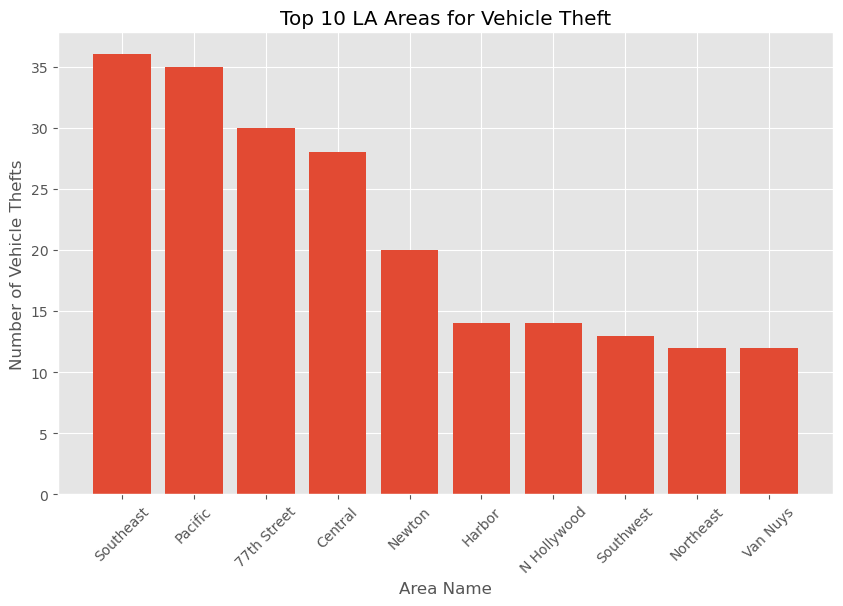

In [284]:


# Filtering the DataFrame for vehicle theft - adapt the condition to match your dataset's specifics
vehicle_theft_df = la_crime_df[la_crime_df["Crm_Cd_Desc"].str.contains("VEHICLE - STOLEN", na=False)]

# Counting occurrences in each area and getting the top 10
top_vehicle_theft_areas = vehicle_theft_df['Area_Name'].value_counts().head(10)

# Display the results
print(top_vehicle_theft_areas)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_vehicle_theft_areas.index, top_vehicle_theft_areas.values)  # Plot a bar chart
plt.title('Top 10 LA Areas for Vehicle Theft')
plt.xlabel('Area Name') 
plt.ylabel('Number of Vehicle Thefts') 
plt.xticks(rotation=45) 
plt.show()  


In [285]:
la_crime_df.shape

(691276, 13)

In [286]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      691276 non-null  datetime64[ns]
 1   Time_Occ      691276 non-null  int64         
 2   Area_Name     691276 non-null  object        
 3   Rpt_Dist_No   691276 non-null  int64         
 4   Part_1-2      691276 non-null  int64         
 5   Crm_Cd_Desc   691276 non-null  object        
 6   Vict_Age      691276 non-null  int64         
 7   Vict_Sex      691276 non-null  object        
 8   Vict_Descent  691276 non-null  object        
 9   Status_Desc   691276 non-null  object        
 10  Crm_Cd_1      691276 non-null  float64       
 11  Lat           691276 non-null  float64       
 12  Lon           691276 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 73.8+ MB


In [287]:
#Pre Machine Learning 
#Visualize the data using pandas histogram for the continous variables 

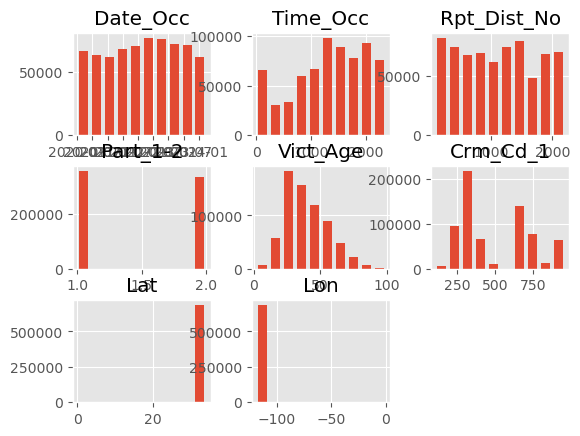

<Figure size 1200x800 with 0 Axes>

In [288]:
la_crime_df.hist(rwidth=0.7)
plt.figure(figsize=(12, 8))  # Set the figure size
plt.tight_layout()

In [289]:
#the above visualization looks like it is in normal distribution

In [290]:
la_crime_df.head()

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
1,2020-02-08,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,Other,Invest Cont,330.0,34.0444,-118.2628
2,2020-11-04,1700,Southwest,356,1,BIKE - STOLEN,19,X,Unknown,Invest Cont,480.0,34.0210,-118.3002
3,2020-03-10,2037,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,Other,Invest Cont,343.0,34.1576,-118.4387
4,2020-08-17,1200,Hollywood,666,2,THEFT OF IDENTITY,28,M,Hispanic/Latin/Mexican,Invest Cont,354.0,34.0944,-118.3277
5,2020-12-01,2300,Southeast,1826,2,THEFT OF IDENTITY,41,M,Hispanic/Latin/Mexican,Invest Cont,354.0,33.9467,-118.2463


In [291]:
la_crime_df = la_crime_df[["Vict_Sex","Vict_Age","Lat","Lon","Rpt_Dist_No","Vict_Descent","Area_Name","Crm_Cd_Desc"]]

In [292]:
la_crime_df.head()

,Vict_Sex,Vict_Age,Lat,Lon,Rpt_Dist_No,Vict_Descent,Area_Name,Crm_Cd_Desc
1,M,47,34.0444,-118.2628,182,Other,Central,BURGLARY FROM VEHICLE
2,X,19,34.0210,-118.3002,356,Unknown,Southwest,BIKE - STOLEN
3,M,19,34.1576,-118.4387,964,Other,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4,M,28,34.0944,-118.3277,666,Hispanic/Latin/Mexican,Hollywood,THEFT OF IDENTITY
5,M,41,33.9467,-118.2463,1826,Hispanic/Latin/Mexican,Southeast,THEFT OF IDENTITY


In [293]:
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    348234
F    334231
X      8811
Name: count, dtype: int64

In [294]:
la_crime_df["Vict_Descent"].value_counts()

Vict_Descent
Hispanic/Latin/Mexican            276655
White                             173400
Black                             128204
Other                              60991
Other Asian                        19980
Unknown                            15065
Korean                              5059
Filipino                            3938
Chinese                             3706
Japanese                            1304
Vietnamese                           981
American Indian/Alaskan Native       881
Asian Indian                         458
P                                    249
Hawaiian                             156
Cambodian                             75
Guamanian                             67
Laotian                               62
Samoan                                45
Name: count, dtype: int64

In [295]:
la_crime_df["Area_Name"].value_counts()

Area_Name
Central        48784
77th Street    43957
Southwest      43942
Pacific        38818
Hollywood      36911
Southeast      35001
Olympic        34395
N Hollywood    33538
Wilshire       33532
Topanga        32063
Newton         31979
Rampart        31494
West LA        31439
Van Nuys       31115
West Valley    29015
Mission        28132
Northeast      27657
Devonshire     27176
Harbor         26191
Foothill       23117
Hollenbeck     23020
Name: count, dtype: int64

In [296]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Vict_Sex      691276 non-null  object 
 1   Vict_Age      691276 non-null  int64  
 2   Lat           691276 non-null  float64
 3   Lon           691276 non-null  float64
 4   Rpt_Dist_No   691276 non-null  int64  
 5   Vict_Descent  691276 non-null  object 
 6   Area_Name     691276 non-null  object 
 7   Crm_Cd_Desc   691276 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 47.5+ MB


In [297]:
#change the object dtypes into categorical
la_crime_df["Vict_Sex"] = la_crime_df["Vict_Sex"].astype("category")
la_crime_df["Area_Name"] = la_crime_df["Area_Name"].astype("category")
la_crime_df["Vict_Descent"]=la_crime_df["Vict_Descent"].astype("category")

In [298]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Vict_Sex      691276 non-null  category
 1   Vict_Age      691276 non-null  int64   
 2   Lat           691276 non-null  float64 
 3   Lon           691276 non-null  float64 
 4   Rpt_Dist_No   691276 non-null  int64   
 5   Vict_Descent  691276 non-null  category
 6   Area_Name     691276 non-null  category
 7   Crm_Cd_Desc   691276 non-null  object  
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 33.6+ MB


In [299]:
#Target/dependent Variable Crm_Cd_Desc
#independent variables Vict_Sex, Vict_Age, Lat, Lon,Area_Name

In [300]:
la_crime_df.dtypes

Vict_Sex        category
Vict_Age           int64
Lat              float64
Lon              float64
Rpt_Dist_No        int64
Vict_Descent    category
Area_Name       category
Crm_Cd_Desc       object
dtype: object

In [301]:

# Convert 'Vict_Sex' and 'Area_Name' to dummy variables
dummies = pd.get_dummies(la_crime_df[['Vict_Sex', 'Area_Name',"Vict_Descent"]])
dummies =dummies.astype(int)

# Concatenate the dummy DataFrame with the original DataFrame (optional)
# This step assumes you want to keep the rest of your data alongside the new dummy variables
la_crime_df = pd.concat([la_crime_df, dummies], axis=1)

# Optionally, you might want to drop the original columns if they are no longer needed
la_crime_df.drop(['Vict_Sex', 'Area_Name',"Vict_Descent"], axis=1, inplace=True)

# Display the DataFrame to verify changes
la_crime_df.head(2)


,Vict_Age,Lat,Lon,Rpt_Dist_No,Crm_Cd_Desc,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,...,Vict_Descent_Japanese,Vict_Descent_Korean,Vict_Descent_Laotian,Vict_Descent_Other,Vict_Descent_Other Asian,Vict_Descent_P,Vict_Descent_Samoan,Vict_Descent_Unknown,Vict_Descent_Vietnamese,Vict_Descent_White
1,47,34.0444,-118.2628,182,BURGLARY FROM VEHICLE,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,19,34.0210,-118.3002,356,BIKE - STOLEN,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [302]:

#creating x and y variables
x=la_crime_df.drop("Crm_Cd_Desc", axis = 1)
y=la_crime_df["Crm_Cd_Desc"]

In [303]:
x.shape # its a dataframe

(691276, 47)

In [304]:
y.shape # series 

(691276,)

In [191]:
y

1                                   BURGLARY FROM VEHICLE
2                                           BIKE - STOLEN
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4                                       THEFT OF IDENTITY
5                                       THEFT OF IDENTITY
                               ...                       
925714                                  THEFT OF IDENTITY
925715                                        TRESPASSING
925716     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
925717    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
925718                           BATTERY - SIMPLE ASSAULT
Name: Crm_Cd_Desc, Length: 691277, dtype: object

In [305]:
x

,Vict_Age,Lat,Lon,Rpt_Dist_No,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,Area_Name_Devonshire,...,Vict_Descent_Japanese,Vict_Descent_Korean,Vict_Descent_Laotian,Vict_Descent_Other,Vict_Descent_Other Asian,Vict_Descent_P,Vict_Descent_Samoan,Vict_Descent_Unknown,Vict_Descent_Vietnamese,Vict_Descent_White
1,47,34.0444,-118.2628,182,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,19,34.0210,-118.3002,356,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19,34.1576,-118.4387,964,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,28,34.0944,-118.3277,666,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41,33.9467,-118.2463,1826,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925714,62,34.2707,-118.2917,1619,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
925715,79,34.2278,-118.4051,1681,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
925716,36,34.2271,-118.3878,1673,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
925717,44,34.2260,-118.6214,2103,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [306]:
#create train and test dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # 

# You would then train your classifier on X_train and y_train


In [307]:
from sklearn.tree import DecisionTreeClassifier # DecisionTree classifier

In [308]:
#entropy measures the diversity or impurity of within the data , our aim is to get low entropy value
#gini index or coefficient 
#information Gain we can use this for both entropy or gini methods

In [309]:
# IN DecsionTree we are always considering
#min_sample_split
#min_sample_leaf
#max_leaf_nodes
#splitter
#max_features
#presort
#criterion
#min_impurity_decrease

In [310]:
#Train the model and create the object dtc decsion tree classifier
dtc = DecisionTreeClassifier(random_state = 0)

In [311]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [312]:
y_predict = dtc.predict(x_test)
y_predict

array(['THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', ...,
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'BATTERY - SIMPLE ASSAULT', 'BRANDISH WEAPON'], dtype=object)

In [313]:
#Evaluating the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
score = dtc.score(x_test,y_test)

In [314]:
cm

array([[  11,    0,   38, ...,    1,    0,    0],
       [   0,   12,    6, ...,    0,    0,    0],
       [  31,    7, 2159, ...,   95,    5,    0],
       ...,
       [   7,    0,  107, ...,  715,    9,    0],
       [   0,    0,    5, ...,   29,    8,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [315]:
score

0.133874168928185

In [316]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

def fit_decision_tree(la_crime_df, features, target='Crm_Cd_Desc'):
    # Ensure the features list only includes the columns specified
    x = la_crime_df[['Vict_Age', 'Lat', 'Lon', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X',
            'Area_Name_77th Street', 'Area_Name_Central', 'Area_Name_Devonshire',
            'Area_Name_Foothill', 'Area_Name_Harbor', 'Area_Name_Hollenbeck',
            'Area_Name_Hollywood', 'Area_Name_Mission', 'Area_Name_N Hollywood',
            'Area_Name_Newton', 'Area_Name_Northeast', 'Area_Name_Olympic',
            'Area_Name_Pacific', 'Area_Name_Rampart', 'Area_Name_Southeast',
            'Area_Name_Southwest', 'Area_Name_Topanga', 'Area_Name_Van Nuys',
            'Area_Name_West LA', 'Area_Name_West Valley', 'Area_Name_Wilshire']]
    y = la_crime_df[['Crm_Cd_Desc']]

    # Split the data into training and test sets, training set 75% and the test set 25%
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

    # Initialize and train the decision tree classifier
    model = DecisionTreeClassifier(random_state=0)
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Output the classification report
    print(classification_report(y_test, y_pred))

    # Output feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("Feature Importances:\n", feature_importance)

    # Plot the decision tree
    #plt.figure(figsize=(20,10))
    #plot_tree(model, filled=True, feature_names=features, class_names=[str(cls) for cls in model.classes_], proportion=True)
    #plt.show()

    return model

# Example usage
# Define the features list according to your DataFrame structure
features = ['Vict_Age', 'Lat', 'Lon', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X',
            'Area_Name_77th Street', 'Area_Name_Central', 'Area_Name_Devonshire',
            'Area_Name_Foothill', 'Area_Name_Harbor', 'Area_Name_Hollenbeck',
            'Area_Name_Hollywood', 'Area_Name_Mission', 'Area_Name_N Hollywood',
            'Area_Name_Newton', 'Area_Name_Northeast', 'Area_Name_Olympic',
            'Area_Name_Pacific', 'Area_Name_Rampart', 'Area_Name_Southeast',
            'Area_Name_Southwest', 'Area_Name_Topanga', 'Area_Name_Van Nuys',
            'Area_Name_West LA', 'Area_Name_West Valley', 'Area_Name_Wilshire'] # List of feature names

# Make sure your DataFrame 'la_crime_df' is preprocessed before using this function
model = fit_decision_tree(la_crime_df, features)



C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\si

                                                          precision    recall  f1-score   support

                                                   ARSON       0.03      0.04      0.03       341
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.17      0.25      0.20        60
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.15      0.18      0.16     12713
                                       ATTEMPTED ROBBERY       0.01      0.01      0.01      1018
                                BATTERY - SIMPLE ASSAULT       0.17      0.19      0.18     18141
                                BATTERY ON A FIREFIGHTER       0.00      0.00      0.00        44
                                 BATTERY POLICE (SIMPLE)       0.13      0.15      0.14       171
                             BATTERY WITH SEXUAL CONTACT       0.04      0.04      0.04       994
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       0.00      0.00      0.00         1
                   

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
